# 04 - Supervised Learning (Classification)

In [1]:
# Required Libs
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Import Dataset
heart_disease_selected = pd.read_csv(r'C:\Users\eyad0\Documents\python\Heart_Disease_Project\data\heart_disease_selected.csv')
heart_disease_pca = pd.read_csv(r"C:\Users\eyad0\Documents\python\Heart_Disease_Project\data\heart_disease_pca.csv")

print(heart_disease_selected.head())
print(heart_disease_pca.head())

   thal_7.0   cp_4  exang  ca_2.0  ca_3.0  slope_2   cp_3   cp_2   oldpeak  \
0     False  False      0   False   False    False  False  False  1.087338   
1     False   True      1   False    True     True  False  False  0.397182   
2      True   True      1    True   False     True  False  False  1.346147   
3     False  False      0   False   False    False   True  False  2.122573   
4     False  False      0   False   False    False  False   True  0.310912   

   ca_1.0  num  
0   False    0  
1   False    2  
2   False    1  
3   False    0  
4   False    0  
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.072490  0.258394  1.037182 -0.119774  0.953289 -0.168047 -0.151114   
1 -2.804616  0.536802  0.003767 -0.617366 -0.979691 -0.090323 -0.259099   
2 -1.957112 -1.208116 -0.428867  0.056204  0.846473  0.874964 -0.066097   
3  1.135660 -0.251109  1.406952  2.691248  1.082938 -0.893851  0.210580   
4  1.591257 -0.273598  0.984122  0.735972  0.129932 -0

In [2]:
# Split Selected Columns
x_selected = heart_disease_selected.drop("num", axis=1)
y_selected = heart_disease_selected["num"]

x_train_sel, x_test_sel, y_train_sel, y_test_sel = train_test_split(
    x_selected, y_selected, test_size=0.2, random_state=42, stratify=y_selected
)

print("Selected dataset:")
print("Train:", x_train_sel.shape, "Test:", x_test_sel.shape)

Selected dataset:
Train: (242, 10) Test: (61, 10)


In [3]:
# Split PCA Columns
x_pca = heart_disease_pca.drop("num", axis=1)
y_pca = heart_disease_pca["num"]

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(
    x_pca, y_pca, test_size=0.2, random_state=42, stratify=y_pca
)

print("\nPCA dataset:")
print("Train:", x_train_pca.shape, "Test:", x_test_pca.shape)


PCA dataset:
Train: (242, 13) Test: (61, 13)


In [4]:
# Convert target to binary (0 = no disease, 1 = disease)
y_train_sel_bin = (y_train_sel > 0).astype(int)
y_test_sel_bin  = (y_test_sel > 0).astype(int)

y_train_pca_bin = (y_train_pca > 0).astype(int)
y_test_pca_bin  = (y_test_pca > 0).astype(int)


In [5]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "SVM": SVC(probability=True, kernel="rbf", random_state=42)
}

# Train models on Selected dataset (binary target)
trained_models_selected = {}
for name, model in models.items():
    model.fit(x_train_sel, y_train_sel_bin)   # <<< هنا التغيير
    trained_models_selected[name] = model
print("Trained all models on Selected dataset (binary).")

# Train models on PCA dataset (binary target)
trained_models_pca = {}
for name, model in models.items():
    model.fit(x_train_pca, y_train_pca_bin)   # <<< هنا التغيير
    trained_models_pca[name] = model
print("Trained all models on PCA dataset (binary).")



Trained all models on Selected dataset (binary).
Trained all models on PCA dataset (binary).


=== Selected Dataset Results ===


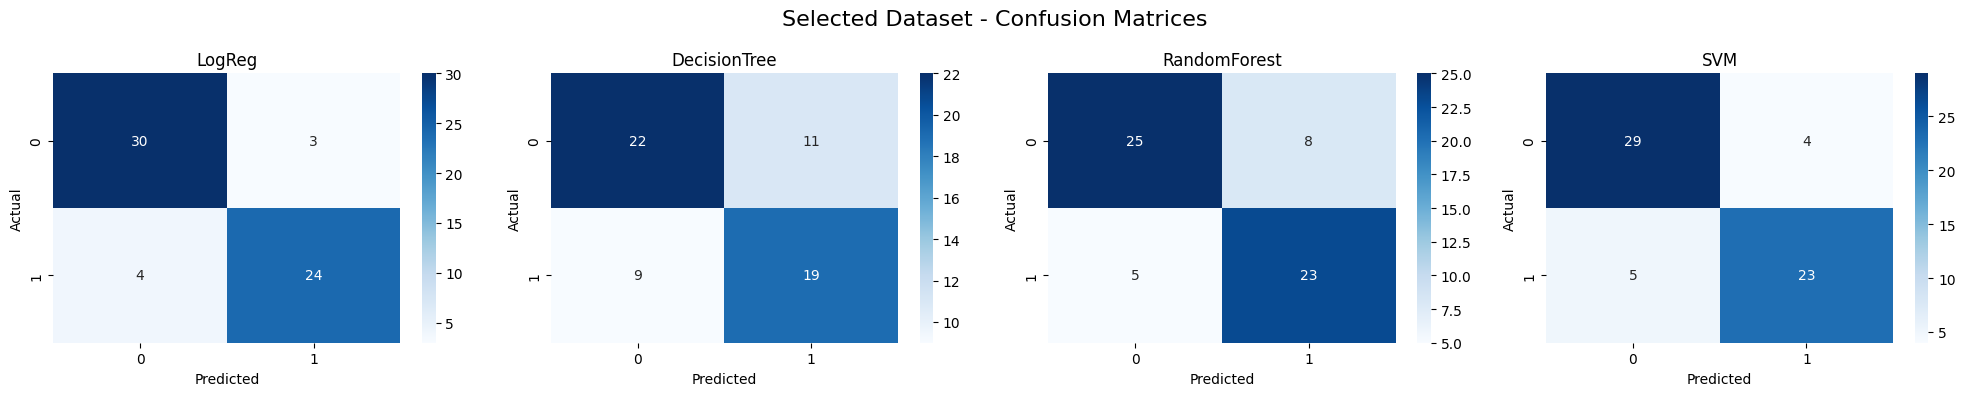

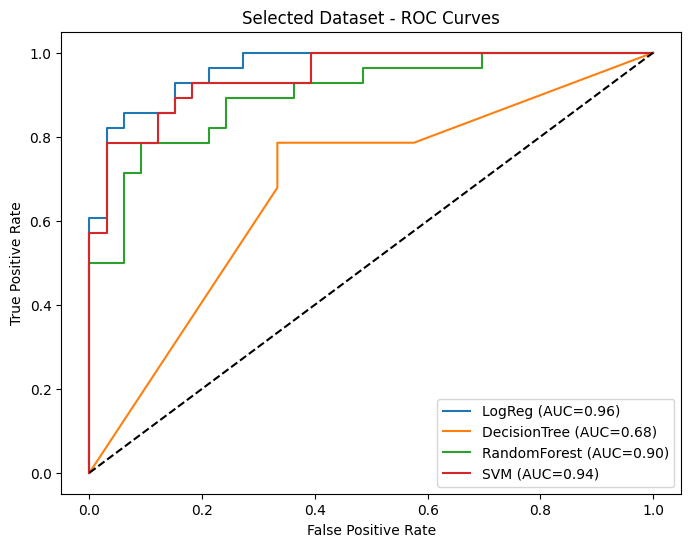

          Model  Accuracy  Precision    Recall        F1   ROC AUC
0        LogReg  0.885246   0.885353  0.885246  0.885059  0.963203
1  DecisionTree  0.672131   0.674634  0.672131  0.672661  0.682359
2  RandomForest  0.786885   0.791380  0.786885  0.787229  0.900433
3           SVM  0.852459   0.852441  0.852459  0.852219  0.944805

=== PCA Dataset Results ===


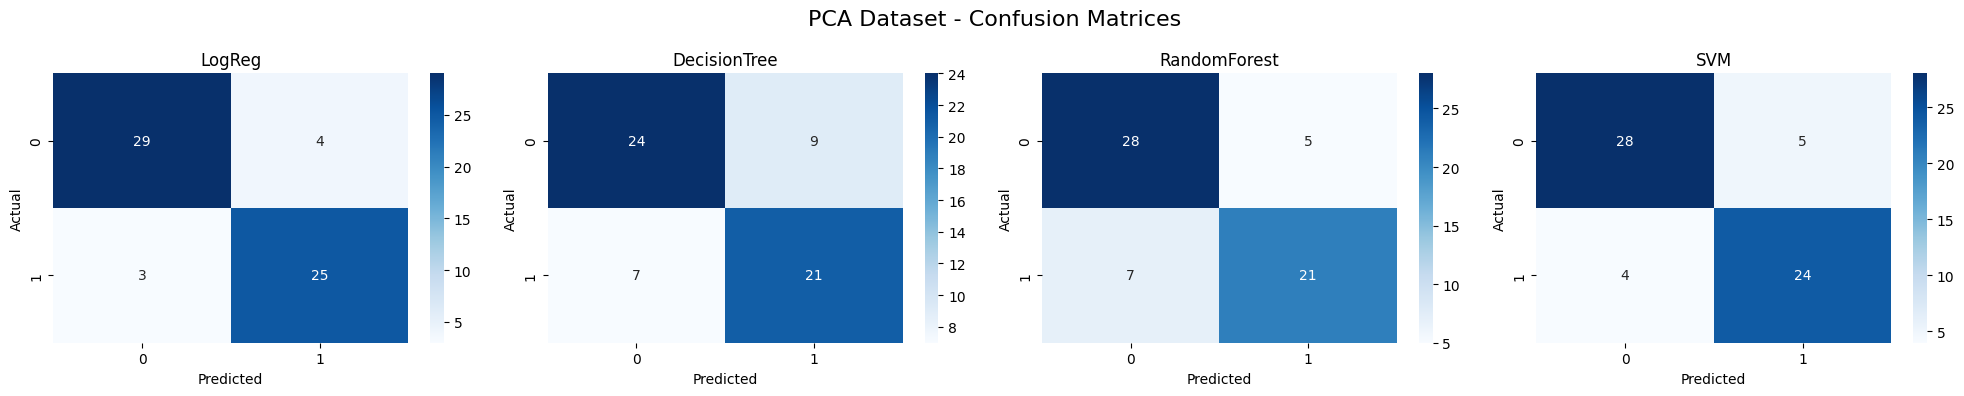

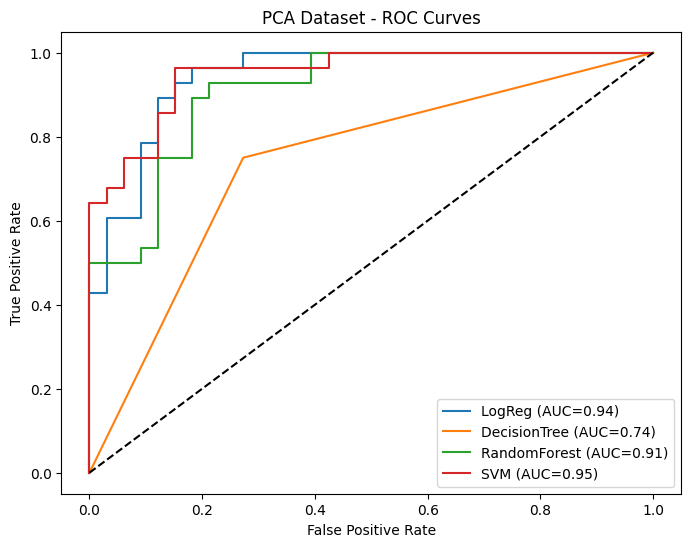

          Model  Accuracy  Precision    Recall        F1   ROC AUC
0        LogReg  0.885246   0.885970  0.885246  0.885370  0.943723
1  DecisionTree  0.737705   0.740137  0.737705  0.738129  0.738636
2  RandomForest  0.803279   0.803531  0.803279  0.802529  0.909091
3           SVM  0.852459   0.853236  0.852459  0.852618  0.950216


In [6]:
# ================================
# Train & Evaluate Models (Multi-class with ROC plots)
# ================================

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
)
from sklearn.preprocessing import label_binarize
import seaborn as sns
import pandas as pd
import numpy as np

# --- Helper function to evaluate ---
def evaluate_models(trained_models, x_test, y_test, dataset_name):
    results = []

    classes = np.unique(y_test)
    is_binary = len(classes) == 2  # تحديد إذا كانت binary أو multi-class

    if not is_binary:
        y_test_bin = label_binarize(y_test, classes=classes)

    # -------- Confusion Matrices in Subplots --------
    n_models = len(trained_models)
    fig_cm, axes_cm = plt.subplots(1, n_models, figsize=(5*n_models, 4))
    if n_models == 1:
        axes_cm = [axes_cm]

    for ax, (name, model) in zip(axes_cm, trained_models.items()):
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
        ax.set_title(f"{name}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
    plt.suptitle(f"{dataset_name} - Confusion Matrices", fontsize=16)
    plt.tight_layout()
    plt.show()

    # -------- ROC Curves in One Plot --------
    plt.figure(figsize=(8,6))
    for name, model in trained_models.items():
        y_proba = model.predict_proba(x_test)
        if is_binary:
            fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
            auc = roc_auc_score(y_test, y_proba[:,1])
            plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
        else:
            y_test_bin = label_binarize(y_test, classes=classes)
            auc = roc_auc_score(y_test_bin, y_proba, multi_class="ovr")
            for i, cls in enumerate(classes):
                fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
                plt.plot(fpr, tpr, label=f"{name} Class {cls}")
    plt.plot([0,1],[0,1],'k--')
    plt.title(f"{dataset_name} - ROC Curves")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    # -------- Metrics Table --------
    for name, model in trained_models.items():
        y_pred = model.predict(x_test)
        y_proba = model.predict_proba(x_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average="weighted")
        rec = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")
        if is_binary:
            auc = roc_auc_score(y_test, y_proba[:,1])
        else:
            auc = roc_auc_score(y_test_bin, y_proba, multi_class="ovr")
        results.append([name, acc, prec, rec, f1, auc])

    return pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1","ROC AUC"])


# --- Selected Dataset Models ---
models_selected = {
    "LogReg": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

trained_models_selected = {}
for name, model in models_selected.items():
    model.fit(x_train_sel, y_train_sel_bin)
    trained_models_selected[name] = model

print("=== Selected Dataset Results ===")
results_selected = evaluate_models(trained_models_selected, x_test_sel, y_test_sel_bin, "Selected Dataset")
print(results_selected)


# --- PCA Dataset Models ---
models_pca = {
    "LogReg": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

trained_models_pca = {}
for name, model in models_pca.items():
    model.fit(x_train_pca, y_train_pca_bin)
    trained_models_pca[name] = model

print("\n=== PCA Dataset Results ===")
results_pca = evaluate_models(trained_models_pca, x_test_pca, y_test_pca_bin, "PCA Dataset")
print(results_pca)
